In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,BB_SMA,BB_STD,Upper_Band,Lower_Band,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,
2021-06-08,398.923584,399.802139,397.072000,399.707664,47134300,393.778340,4.291682,402.361703,385.194977,NaN,NaN,NaN
2021-06-09,398.328400,399.849365,398.101683,399.773774,48436300,394.129761,4.365191,402.860143,385.399379,0.0,-0.001492,0.000000
2021-06-10,400.180023,401.143625,398.233965,399.565981,51020100,394.989429,3.697079,402.383586,387.595271,0.0,0.003150,0.000000
2021-06-11,400.841309,400.954667,399.433730,400.737407,45570800,395.652130,3.482049,402.616229,388.688032,0.0,0.004807,0.000000
2021-06-14,401.738770,401.842672,399.698236,400.954661,42358500,396.062125,3.696286,403.454697,388.669552,0.0,0.007057,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28,550.849976,553.549988,545.020020,551.390015,47613800,534.419498,19.276850,572.973198,495.865797,0.0,0.380841,-0.072897
2025-04-29,554.320007,555.450012,548.549988,548.909973,47775100,534.165997,18.961957,572.089912,496.242083,0.0,0.389539,-0.072897
2025-04-30,554.539978,556.520020,541.520020,547.570007,93101500,533.844498,18.533241,570.910980,496.778016,0.0,0.390091,-0.072897


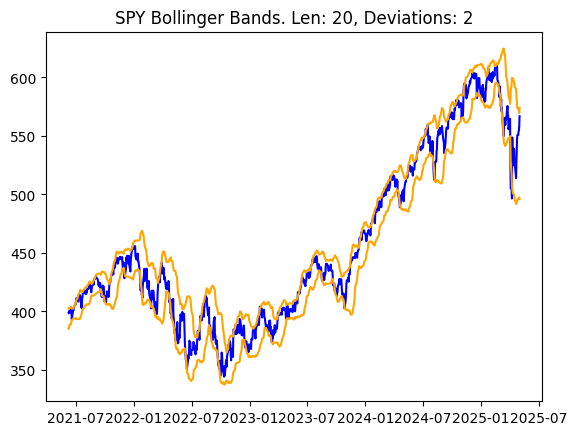

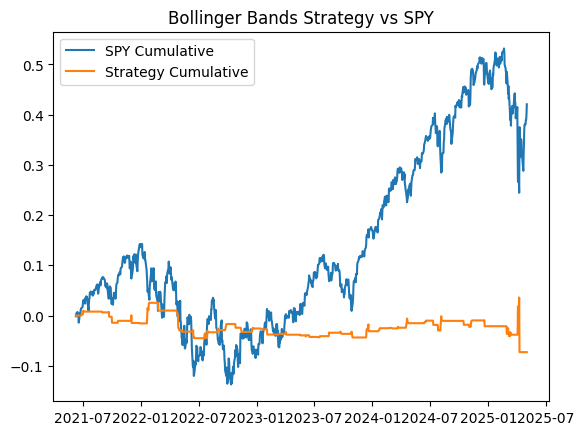

In [2]:
TICKER = 'SPY'
BB_LEN = 20
DEVS = 2
LOOKBACK = 1000

def get_data(ticker=TICKER, lookback=LOOKBACK):
    df = yf.download(ticker)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-lookback:, :]

def add_bollinger_bands(df, devs=DEVS, bb_len=BB_LEN):

    # can change to ema (use MACD video/code for reference)
    df['BB_SMA'] = df['Close'].rolling(bb_len).mean()

    # get the standard deviation of the close prices for the period
    df['BB_STD'] = df['Close'].rolling(bb_len).std()

    df['Upper_Band'] = df['BB_SMA'] + (devs * df['BB_STD'])
    df['Lower_Band'] = df['BB_SMA'] - (devs * df['BB_STD'])

    df = df.dropna()

    plt.plot(df['Close'], color='blue')
    plt.plot(df['Upper_Band'], color='orange')
    plt.plot(df['Lower_Band'], color='orange')

    plt.title(f'{TICKER} Bollinger Bands. Len: {BB_LEN}, Deviations: {DEVS}');

    return df

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(
        df['Close'] > df['Upper_Band'], 1, 
        np.where(df['Close'] < df['Lower_Band'], -1, 0)
        )
    
    df['Strategy'] = df['Strategy'].shift(1)
    
    return df

def test_strategy(df):

    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    # plot the strategy returns
    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative', 'Strategy Cumulative'])
    plt.title(F'Bollinger Bands Strategy vs {TICKER}');

    return df


def main():
    df = get_data()
    df = add_bollinger_bands(df)
    df = add_strategy(df)
    df = test_strategy(df)

    return df

df = main()

df